Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

### **Importación de librerias**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **Carga de dataset TRAIN y conversión a DataFrame de Pandas**

In [4]:
df = pd.read_csv('data/train.csv')
df = pd.DataFrame(df)
df.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


### ****1. Análisis exploratorio de datos (EDA):**** 
**Tamaño, encoding, data types, missings, valores unicos, balance del target**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [6]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(df)

COL_N,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
DATA_TYPE,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,5597,479,2320,107,470,23,784,91,201,151,...,199,1664,274,11,2562,724,11,51,10,2
CARDIN (%),100.0,8.56,41.45,1.91,8.4,0.41,14.01,1.63,3.59,2.7,...,3.56,29.73,4.9,0.2,45.77,12.94,0.2,0.91,0.18,0.04


In [7]:
df['target'].value_counts()

0    4957
1     640
Name: target, dtype: int64

In [8]:
value_counts = df['target'].value_counts()
value_perc = value_counts.loc[1] / value_counts.sum() * 100
print('Porcentaje de valores únicos 1', value_perc.round(2),'%')

Porcentaje de valores únicos 1 11.43 %


**Análisis descriptivo de los datos**

In [9]:
df.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,...,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,...,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,...,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,...,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,...,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,...,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,...,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


**Análisis de distribución de la muestra**

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


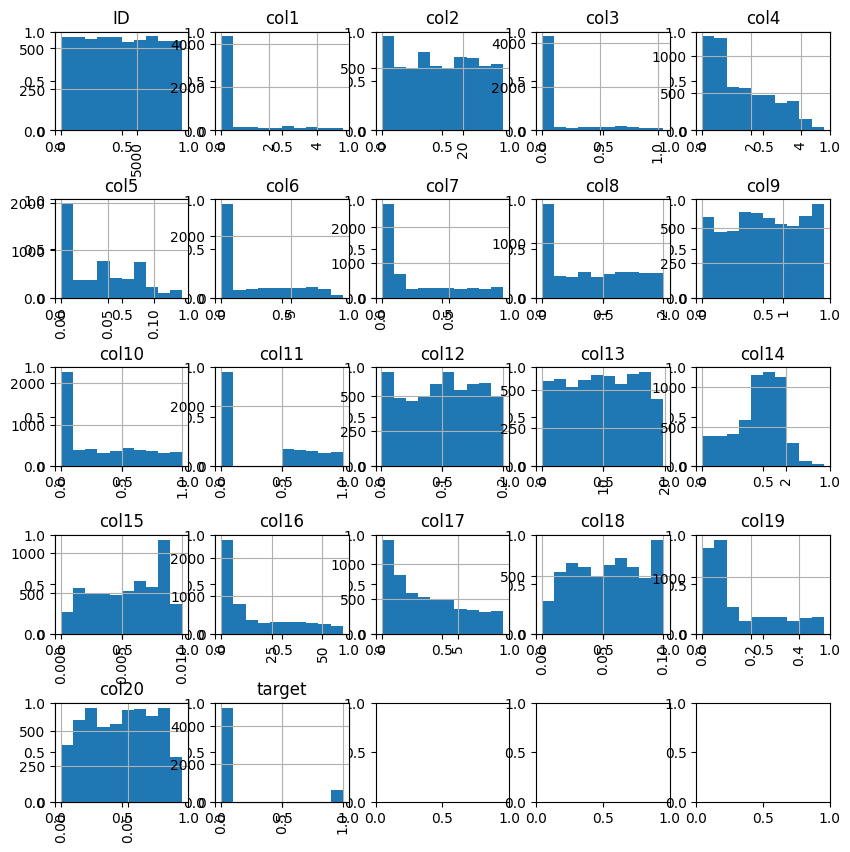

In [10]:
import math

num_cols = len(df.columns)

# Calcula el número de filas y columnas para los subplots

num_rows = math.ceil(math.sqrt(num_cols))
num_cols_subplot = math.ceil(num_cols / num_rows)


fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(10, 10))

for i, column in enumerate(df.columns):
    ax = fig.add_subplot(num_rows,num_cols_subplot, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [11]:
import scipy.stats as stats

# Test de normalidad de D'Agostino-Pearson. Mejor rendimiento que test de Sahpiro en muestras grandes como la actual. 

alpha=0.05

for col in df.columns:
    stat, p = stats.normaltest(df[col])
    print(f"\nD'Agostino-Pearson para {col}: Statistic: {stat:.4f}, p-value: {p:.4f}")
    if p < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")


D'Agostino-Pearson para ID: Statistic: 4826.5776, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col1: Statistic: 2007.6851, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col2: Statistic: 6173.7386, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col3: Statistic: 1952.1458, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col4: Statistic: 703.4727, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col5: Statistic: 1346.2543, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col6: Statistic: 888.9317, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no

**Correlaciones entre las variables**

In [12]:
corr = np.abs(df.corr()['target']).sort_values(ascending=False)
print(corr)


target    1.000000
ID        0.416405
col1      0.358168
col5      0.271454
col6      0.198555
col7      0.174420
col3      0.132675
col19     0.105710
col4      0.104875
col11     0.086419
col17     0.069023
col20     0.068796
col16     0.067342
col13     0.062230
col14     0.054494
col15     0.046551
col8      0.031497
col18     0.021912
col2      0.017318
col10     0.014044
col9      0.003556
col12     0.001483
Name: target, dtype: float64


### **Conclusiones:**

- Tenemos 'target' en el dataset, lo cual indica un modelo supervisado. 
- El target es binario, lo cual determina que tengamos que utilizar un algoritmo de clasificacion binaria.
- El target es desbalanceado.
- Los datos son numericos, todos float excepto el ID y el target.
- Todas las variables son cuantitativas continuas.
- Solo una columna tiene valores negativos (col2)
- Tenemos una columna con ID, que podriamos descartar de inicio. 
- Ninguna variable tiene distribucion normal.
- Columnas 1,3,4,5,6,7,8,10,16,17,19 presentan una distribucion a la izquierda
- La correlacion de todas las variables con el target es menor de 0,5.



### **2. Preprocesamiento de datos:**
**Acciones de transformación propuestas:**

- Eliminar columna ID.
- Todas las correlaciones son bajas, no encuentro un criterio (un punto de corte) util para definir cuales eliminar.
  
**Feature engineering:**
- Aplicamos logaritmo a las columnas 1,3,4,5,6,7,8,10,16,17,19 para intentar normalizar la distribucion. Si no lo conseguimos dejaremos el dataframe original. 
- Aplicar un oversample para balancear el target.
- Estandarizacion de los datos.
  

In [13]:
df = df.drop(columns=['ID'])

In [14]:
df.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17',
       'col18', 'col19', 'col20', 'target'],
      dtype='object')

In [15]:
# Aplicación de la transformacion logaritmica  a las columnas mencionadas

columns_to_transform = ['col1','col3', 'col4', 'col5', 'col6','col7','col8', 'col10', 'col16',
       'col17', 'col19']

normalized_df = df[columns_to_transform].apply(np.log1p)


C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


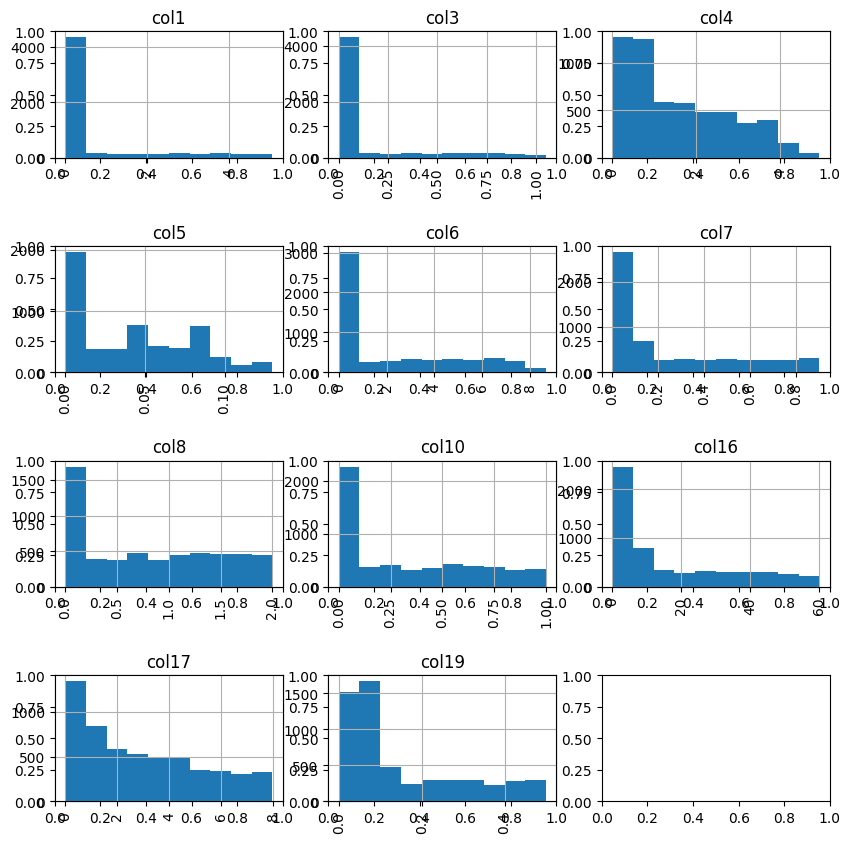

In [16]:
num_cols = len(normalized_df.columns)

# Calcula el número de filas y columnas para los subplots

num_rows = math.ceil(math.sqrt(num_cols))
num_cols_subplot = math.ceil(num_cols / num_rows)


fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(10, 10))

for i, column in enumerate(normalized_df.columns):
    ax = fig.add_subplot(num_rows,num_cols_subplot, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [17]:
import scipy.stats as stats

# Test de normalidad de D'Agostino-Pearson. Mejor rendimiento que test de Sahpiro en muestras grandes como la actual. 

alpha=0.05

for col in normalized_df.columns:
    stat, p = stats.normaltest(df[col])
    print(f"\nD'Agostino-Pearson para {col}: Statistic: {stat:.4f}, p-value: {p:.4f}")
    if p < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")


D'Agostino-Pearson para col1: Statistic: 2007.6851, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col3: Statistic: 1952.1458, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col4: Statistic: 703.4727, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col5: Statistic: 1346.2543, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col6: Statistic: 888.9317, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col7: Statistic: 740.9574, p-value: 0.0000
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal

D'Agostino-Pearson para col8: Statistic: 132960.2535, p-value: 0.0000
Rechazar la hipótesis nula: la muestra

**(La distribución de las muestras no pueden normalizarse con transformación logarítmica. Decido utilizar el dataframe original)**

In [18]:
#Oversampling

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42, sampling_strategy=1)
X_ros, y_ros = ros.fit_resample(df.loc[:, df.columns != 'target'], df['target'])

X_ros = pd.DataFrame(X_ros, columns=df.loc[:, df.columns != 'target'].columns)
y_ros = pd.DataFrame(y_ros, columns=['target'])
df_ros = pd.concat([X_ros, y_ros], axis=1)
df_ros['target'].value_counts()
df = df_ros

In [19]:
df['target'].value_counts()

0    4957
1    4957
Name: target, dtype: int64

In [20]:
value_counts = df['target'].value_counts()
value_perc = value_counts.loc[1] / value_counts.sum() * 100
print('Porcentaje de valores únicos 1:', value_perc.round(2),'%')

Porcentaje de valores únicos 1: 50.0 %


**Standarización del dataframe de entrenamiento (sin el target)**

In [21]:
# Declaro X e y

X = df.drop(columns='target')
y = df["target"]

In [22]:
np.unique(y)

array([0, 1], dtype=int64)

In [23]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler()
X = pd.DataFrame(X_scaled.fit_transform(X), columns=X.columns)


In [24]:
X.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,-0.770381,1.441367,-0.157066,-0.313123,0.816367,-1.048230,-0.776858,1.771381,1.613333,-0.988568,-0.769761,-1.190155,0.023779,-1.027872,-1.353369,-1.031831,-0.925813,1.445482,-0.575045,1.389620
1,-0.051937,-1.180858,0.882519,1.800729,-0.040063,0.700561,0.902715,1.647340,1.339730,1.535955,1.436127,1.217145,0.788042,-0.425337,0.322285,-0.465086,0.276227,-1.011498,1.918270,0.648479
2,-0.738018,-0.710349,-0.383062,-1.296878,0.245414,-1.059710,-0.884065,-1.205602,-1.761104,-0.988568,-0.794241,0.351209,-1.201524,0.293817,0.992547,-0.855903,-1.222030,-0.660501,-0.911980,-1.204372
3,-0.725073,1.395464,-0.428262,-0.662722,1.672798,-0.864550,-1.098479,-0.724943,-1.692704,-0.280470,-0.783361,-0.774506,-0.738710,1.149028,-1.688500,-0.418213,-1.230616,1.445482,-1.046754,0.277909
4,-0.174914,0.026398,-0.428262,0.930797,-0.810850,-0.776536,0.438152,0.856579,-1.510302,1.074152,1.028133,0.610990,0.064563,1.012972,0.322285,0.546654,0.988865,1.094485,0.166211,-0.833802


**Feature importance con RandomForest**

In [25]:
from sklearn.ensemble import RandomForestRegressor


names = X.columns

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X, y)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])

,Score,Feature
0,0.3114,col5
1,0.1602,col1
2,0.0801,col19
3,0.0535,col20
4,0.0527,col6
5,0.0458,col16
6,0.0454,col13
7,0.0421,col14
8,0.0396,col11
9,0.0331,col2


**(El Feature Importance esta por debajo de 0.1 en 18 de las 20 columnas, por lo tanto no es recomendable reducir features segun este criterio)**

**Ya tenemos el dataset de train preparado para los modelos.**


### **3 y 4. Creación y evaluación de los modelos:**
- Logistic Regression
- Decision Tree Clasiffier
- SVM
- Random Forest
- XGBoost

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Cross validation. 
# Score: Accuracy

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    accuracy = cross_val_score(model, X_train, y_train, scoring="accuracy", cv = kf)
    return(accuracy)

**Logistic Regression**

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
score = rmsle_cv(lr)
print("Logistic Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Logistic Regression score: 0.7954 (0.0066)



**Decision Tree Clasiffier**

In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
score = rmsle_cv(dt)
print("Decision Tree Classifier score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Decision Tree Classifier score: 0.9827 (0.0030)



**SVM**

In [31]:
svm_clas = SVC(random_state=42)
svm_clas.fit(X_train, y_train)
score = rmsle_cv(svm_clas)
print("Support Vector Machine score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Support Vector Machine score: 0.9417 (0.0081)



**Random Forest**

In [32]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
score = rmsle_cv(rf)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 0.9869 (0.0020)



**XGBoost Classifier**

In [33]:
xgb_clas = xgb.XGBRFClassifier(random_state=42)
xgb_clas.fit(X_train, y_train)
score = rmsle_cv(xgb_clas)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.9555 (0.0028)



### **5. Selección del modelo:**
#### El score del modelo Random Forest fue el mas alto

**Optimización de hiperparámetros**

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

randomforest = RandomForestClassifier()

grid_search = GridSearchCV(randomforest,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1
                          )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [35]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [36]:
best_params

{'max_depth': None, 'n_estimators': 300}

In [37]:
best_score

0.9876432966147555

In [38]:
from sklearn.metrics import accuracy_score

best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)
accuracy_score(best_rf.predict(X_test), y_test)

0.9924357034795764

### **6. Predicción**


In [39]:
# Predicciones con Random Forest y el set de entrenamiento X_test
y_pred = best_rf.predict(X_test)

In [40]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                                recall_score, f1_score, roc_auc_score, classification_report,jaccard_score,roc_curve, auc)

**Prueba del modelo con mas métricas:**

In [42]:
def eval_metrics(y_pred,y_test,clf=True,c_matrix=False):
    '''
    Objetivo: 
    ---
    Evaluar el modelo con las métricas que correspondan.

    args.
    ---
    y_pred: la predicción realizada por el modelo. 
    y_test: el resultado real del test. 
    clf: bool; True: si es clasificación. (por defecto)
               False: si es regresión.
    c_matrix: bool; True: obtener matriz de confusión.
                    False: no obtener la matriz. (por defecto)
    ret.
    ---
    dict; resultado de las métricas.

    * Excepto si c_matrix True y clf True:
        dict, array; resultados métricas, matriz de confusión.

    '''

    if clf:
        
        clf_metrics = {
            'ACC' : accuracy_score(y_test,y_pred),
            'Precision' : precision_score(y_test,y_pred),
            'Recall' : recall_score(y_test,y_pred),
            'F1' : f1_score(y_test,y_pred),
            'ROC' : roc_auc_score(y_test,y_pred),
            'Jaccard' : jaccard_score(y_test,y_pred)
        }
        
        if c_matrix:
            confusion_mtx = confusion_matrix(y_test,y_pred)
            return clf_metrics,confusion_mtx
        #print(pd.DataFrame({'Values':clf_metrics.values()},index=clf_metrics.keys()))
        else:
            return clf_metrics

    else:

        reg_metrics = {
            'MAE' : mean_absolute_error(y_test,y_pred),
            'MAPE' : mean_absolute_percentage_error(y_test,y_pred),
            'MSE' : mean_squared_error(y_test,y_pred),
            'R2' : r2_score(y_test,y_pred)
        }   

        #print(pd.DataFrame({'Values':reg_metrics.values()},index=reg_metrics.keys()))

        return reg_metrics 

In [43]:
metricas = pd.DataFrame.from_dict(eval_metrics(y_pred,y_test,clf=True,c_matrix=False), orient='index', columns=['Valor'])
metricas



,Valor
ACC,0.992436
Precision,0.984833
Recall,1.000000
F1,0.992359
ROC,0.992567
Jaccard,0.984833


In [44]:
confusion_mtx = confusion_matrix(y_test,y_pred)
confusion_mtx

array([[994,  15],
       [  0, 974]], dtype=int64)

In [ ]:
# Precision: 15 False Positive.  974 True Positives --> 0.984833
# Recall: 0 False Negative.  974 True Negatives. --> 1.00000

**Predicción con test.csv**

In [45]:
test = pd.read_csv('data/test.csv')

In [48]:
test = test.drop(columns=['ID'])

In [49]:
test_scaled = StandardScaler()
test = pd.DataFrame(test_scaled.fit_transform(test), columns=test.columns)

In [65]:
test_pred = best_rf.predict(test)

test_target = pd.concat([test, pd.DataFrame(test_pred)], axis=1)

test_target.head()



,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,0
0,-0.471170,1.262447,-0.470264,-1.246172,-1.164977,1.186794,2.333039,0.652337,-0.611601,0.940995,...,-1.297974,0.515934,1.036334,-0.733493,-0.847842,2.118305,-0.344727,2.020245,-1.263514,0
1,-0.447081,1.523298,1.910978,0.423188,1.863165,1.862087,2.220345,-1.084962,0.982763,1.273814,...,-1.656692,-0.978202,1.070599,1.277535,2.058212,-0.818619,1.749828,-0.162228,-1.263514,0
2,-0.447081,-1.433389,-0.349184,-0.673108,0.196298,-0.787745,-0.859944,0.972365,1.468004,0.003052,...,1.349703,-1.613302,-0.094403,-1.068665,-0.515218,-1.086792,0.353458,-0.655044,0.599528,0
3,-0.463140,-0.299302,-0.470264,-0.266150,-0.359325,-0.764050,-0.784815,0.576139,0.220241,-0.934891,...,-1.127156,-1.055295,-0.591242,-0.733493,-0.842724,-1.030562,0.353458,-0.795849,0.972137,0
4,-0.511318,-0.437005,-0.591344,0.381662,-1.192759,-0.037420,-0.897508,-1.084962,-1.813150,-0.934891,...,-1.673773,-1.802363,-2.270215,-1.739007,-0.915504,-1.251156,-1.741097,-1.007056,-1.636122,1
